# Feature selection
 
1. Filter methods: ReliefF (classification), correlation (quantitative target)
2. Wrapper methods: Forward selection and backward elimination (e.g. with random forests)
3. Embedded methods: Elastic net (logistic) regression

Let us consider for now two-class classification of species. Furthermore, we will use multi-class classification of tissues for some exercises.


## Filter Methods 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ReliefF import ReliefF

In [2]:
data_with_labels = pd.read_csv("../data/tomato_with_targets.txt", index_col=0)
labels = ['species','position','tissue','root']
data_original = data_with_labels.drop(columns = labels, axis = 1).to_numpy()
target = data_with_labels['species'].to_numpy()

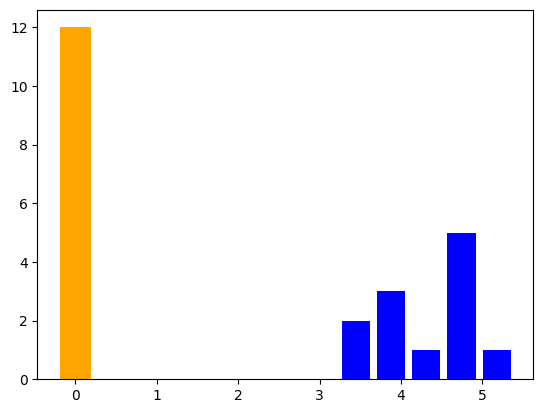

In [3]:
fs = ReliefF(n_neighbors=4, n_features_to_keep=1)
X = fs.fit_transform(data_original, target)
w = np.where(data_with_labels['species']=='M82')
plt.hist(X[w,0], bins=5, density=False, histtype='barstacked', rwidth=0.8, facecolor='blue')
plt.hist(np.delete(X[:,0], w), bins=1, density=False, histtype='barstacked', rwidth=0.38, facecolor='orange')
plt.show()

______________________________

## Embedded Methods 
Embedded Methods embeds the feature selection process inside the ML models. They learn the best feature subset while the model is being created. So compared with the Filter Methods, they tend to have better performance. Compared with the Wrapper Methods, they save large processing time and computing power.

### Regularization Based Methods

Many ML models introduce penalties (L1 norm or L2 norm) in their loss functions to prevent the overfitting problem. The L1 norm penalization in linear models (such as Linear SVC, Logistic Regression, Linear Regression) tends to shrink the feature coefficients of some features to zero therefore results in sparse solutions. So we can assign scores to each feature by their (absolute values of) coefficients in the linear model with regularization. The higher the coefficients, the more important the features in a linear model.